# In this notebook:
## We understand the city specific data through Exploratory Data Analysis  

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Choose any City data to be uploaded here
df = pd.read_csv(r"I:\My Drive\Data Science\Sri Vipra\Code\Cities Seperated\Delhi_data.csv")

Visualizing AQI trend throughout the dataset

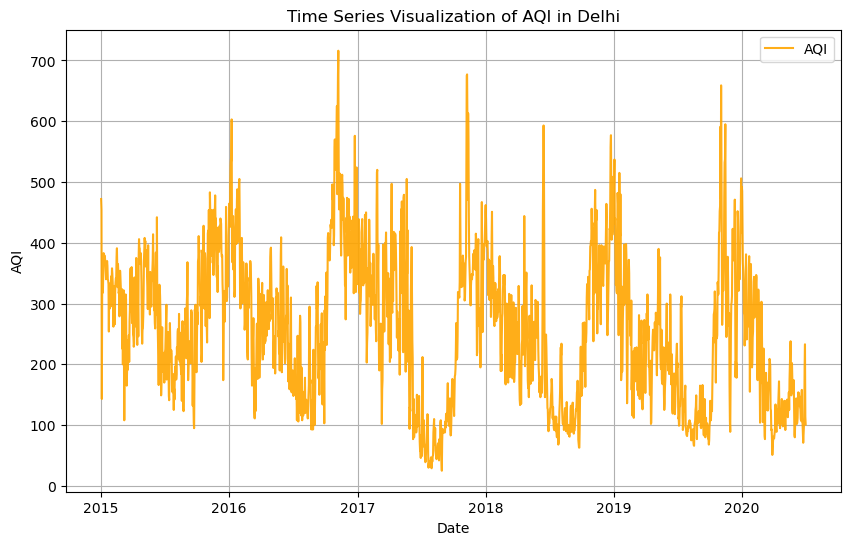

In [3]:
# Convert the 'Date' column to datetime for better time series handling
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plotting the AQI values over time to visualize the time series
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AQI'], label='AQI', color='orange', alpha = 0.9)
plt.title('Time Series Visualization of AQI in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


Checking amount of null values in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2007 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2007 non-null   object 
 1   PM2.5       2007 non-null   float64
 2   PM10        1932 non-null   float64
 3   NOx         2007 non-null   float64
 4   NH3         2000 non-null   float64
 5   CO          2007 non-null   float64
 6   SO2         1899 non-null   float64
 7   O3          1925 non-null   float64
 8   AQI         2007 non-null   float64
 9   AQI_Bucket  2007 non-null   object 
dtypes: float64(8), object(2)
memory usage: 172.5+ KB


In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
City,City,0.000000
PM2.5,PM2.5,0.000000
PM10,PM10,3.736921
NOx,NOx,0.000000
NH3,NH3,0.348779
CO,CO,0.000000
SO2,SO2,5.381166
O3,O3,4.085700
AQI,AQI,0.000000
AQI_Bucket,AQI_Bucket,0.000000


Creating heatmaps/correlation plots to get a glimpse of the relationship existing in between the inputs(Air Pollutants) and the output(AQI in this case)

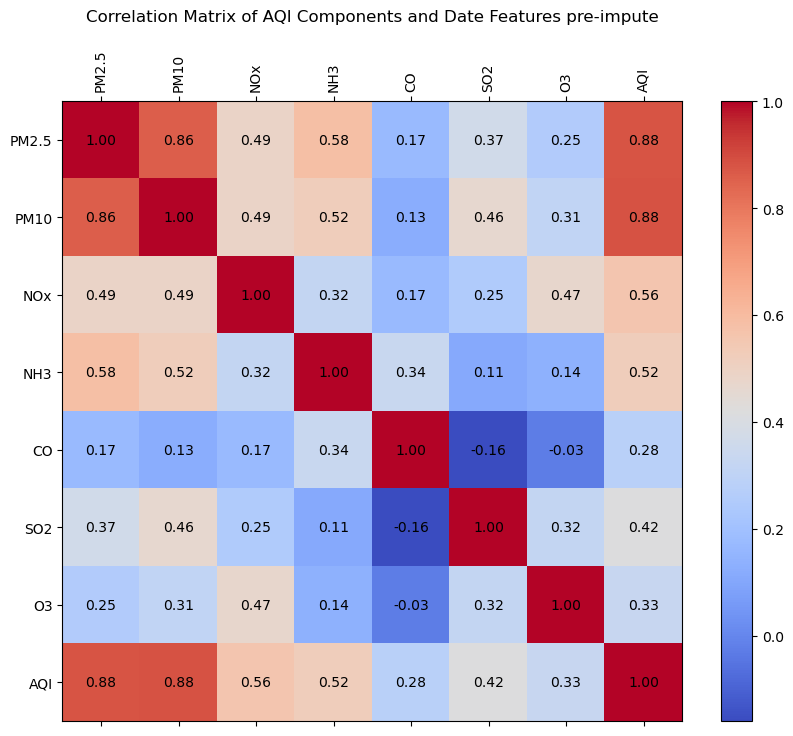

In [6]:
# Creating datetime features such as month, day of the week, and year
df['Month'] = df.index.month
df['Day_of_Week'] = df.index.dayofweek
df['Year'] = df.index.year

# Selecting AQI components and datetime features for correlation
correlation_data = df[['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']]

# Calculating correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix with values displayed in each cell
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)

# Adding correlation values on top of the heatmap cells
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Adding labels and title
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of AQI Components and Date Features pre-impute', pad=20)
plt.show()